# A Simple Time Series Forecasting Model Based on LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
% matplotlib inline

stock_code = '000651'#修改以便对不同股票建模
path = 'D:/data/'#按照文件所在修改文件路径
read_loc = path+stock_code+'.csv'
df = pd.read_csv(read_loc, encoding = 'gb18030', index_col = '日期')
df.index = pd.to_datetime(df.index)
df.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,
2018-05-25,'000651,格力电器,45.74,46.09,45.50,45.61,45.61,0.13,0.285,0.5600,33685203,1.543375e+09,2.751595e+11,2.751595e+11
2018-05-24,'000651,格力电器,45.61,46.40,45.54,46.22,46.22,-0.61,-1.3198,0.7497,45100043,2.071873e+09,2.743775e+11,2.743775e+11
2018-05-23,'000651,格力电器,46.22,46.72,46.10,46.72,46.80,-0.58,-1.2393,0.6644,39970561,1.852564e+09,2.780471e+11,2.780471e+11
2018-05-22,'000651,格力电器,46.80,47.78,46.33,47.78,47.94,-1.14,-2.378,1.3955,83949514,3.931905e+09,2.815362e+11,2.815362e+11
2018-05-21,'000651,格力电器,47.94,48.50,47.73,48.40,48.27,-0.33,-0.6837,0.9543,57405775,2.754568e+09,2.883941e+11,2.883941e+11


In [2]:
df = df.drop(['股票代码', '名称' ],1)
df.head()

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,
2018-05-25,45.74,46.09,45.50,45.61,45.61,0.13,0.285,0.5600,33685203,1.543375e+09,2.751595e+11,2.751595e+11
2018-05-24,45.61,46.40,45.54,46.22,46.22,-0.61,-1.3198,0.7497,45100043,2.071873e+09,2.743775e+11,2.743775e+11
2018-05-23,46.22,46.72,46.10,46.72,46.80,-0.58,-1.2393,0.6644,39970561,1.852564e+09,2.780471e+11,2.780471e+11
2018-05-22,46.80,47.78,46.33,47.78,47.94,-1.14,-2.378,1.3955,83949514,3.931905e+09,2.815362e+11,2.815362e+11
2018-05-21,47.94,48.50,47.73,48.40,48.27,-0.33,-0.6837,0.9543,57405775,2.754568e+09,2.883941e+11,2.883941e+11


In [3]:
df.describe()

,收盘价,最高价,最低价,开盘价,前收盘,换手率,成交量,成交金额,总市值,流通市值
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,3.390000e+02,3.390000e+02,3.390000e+02,3.390000e+02
mean,39.873864,40.413953,39.237021,39.776549,39.918171,1.158595,6.969799e+07,2.786826e+09,2.405437e+11,2.405437e+11
std,8.721907,8.904279,8.505688,8.711172,8.483694,0.501065,3.014274e+07,1.393168e+09,5.082002e+10,5.082002e+10
min,0.000000,0.000000,0.000000,0.000000,23.790000,0.000000,0.000000e+00,0.000000e+00,1.431142e+11,1.431142e+11
25%,33.050000,33.475000,32.570000,32.975000,33.050000,0.838750,5.045585e+07,1.923669e+09,1.990305e+11,1.990305e+11
50%,39.990000,40.590000,39.500000,39.990000,39.950000,1.094300,6.583136e+07,2.579599e+09,2.405691e+11,2.405691e+11
75%,45.915000,46.860000,45.360000,45.975000,45.915000,1.387250,8.345523e+07,3.408979e+09,2.762123e+11,2.762123e+11
max,57.400000,58.700000,55.450000,57.000000,57.400000,6.226400,3.745625e+08,1.712054e+10,3.453030e+11,3.453030e+11


In [4]:
df = df.reindex(index = df.index[::-1])
df.head()

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,
2017-01-03,25.06,25.24,24.70,24.70,24.62,0.44,1.7872,0.9707,58392946,1.461009e+09,1.507542e+11,1.507542e+11
2017-01-04,25.14,25.23,24.88,25.09,25.06,0.08,0.3192,1.1913,71662463,1.795781e+09,1.512355e+11,1.512355e+11
2017-01-05,25.26,25.38,25.09,25.19,25.14,0.12,0.4773,1.0487,63084316,1.592597e+09,1.519574e+11,1.519574e+11
2017-01-06,25.00,25.21,24.85,25.20,25.26,-0.26,-1.0293,0.8995,54112990,1.352108e+09,1.503933e+11,1.503933e+11
2017-01-09,24.74,25.00,24.50,25.00,25.00,-0.26,-1.04,0.9347,56230720,1.390066e+09,1.488292e+11,1.488292e+11


In [5]:
df.tail()

,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,
2018-05-21,47.94,48.50,47.73,48.40,48.27,-0.33,-0.6837,0.9543,57405775,2.754568e+09,2.883941e+11,2.883941e+11
2018-05-22,46.80,47.78,46.33,47.78,47.94,-1.14,-2.378,1.3955,83949514,3.931905e+09,2.815362e+11,2.815362e+11
2018-05-23,46.22,46.72,46.10,46.72,46.80,-0.58,-1.2393,0.6644,39970561,1.852564e+09,2.780471e+11,2.780471e+11
2018-05-24,45.61,46.40,45.54,46.22,46.22,-0.61,-1.3198,0.7497,45100043,2.071873e+09,2.743775e+11,2.743775e+11
2018-05-25,45.74,46.09,45.50,45.61,45.61,0.13,0.285,0.5600,33685203,1.543375e+09,2.751595e+11,2.751595e+11


In [6]:
df.drop(df.index[df['收盘价']<=0], inplace = True)
df.describe()

,收盘价,最高价,最低价,开盘价,前收盘,换手率,成交量,成交金额,总市值,流通市值
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,39.991834,40.533521,39.353107,39.894231,39.924024,1.162022,6.990419e+07,2.795071e+09,2.405801e+11,2.405801e+11
std,8.459643,8.640634,8.244969,8.449907,8.495586,0.497812,2.994701e+07,1.386926e+09,5.089093e+10,5.089093e+10
min,23.790000,24.160000,23.310000,23.790000,23.790000,0.500500,3.010678e+07,8.136704e+08,1.431142e+11,1.431142e+11
25%,33.077500,33.610000,32.607500,33.002500,33.040000,0.840525,5.056351e+07,1.930043e+09,1.989853e+11,1.989853e+11
50%,39.995000,40.595000,39.500000,39.995000,39.970000,1.094950,6.586949e+07,2.580066e+09,2.405992e+11,2.405992e+11
75%,45.932500,46.865000,45.360000,45.987500,45.932500,1.389125,8.356809e+07,3.409305e+09,2.763176e+11,2.763176e+11
max,57.400000,58.700000,55.450000,57.000000,57.400000,6.226400,3.745625e+08,1.712054e+10,3.453030e+11,3.453030e+11


In [7]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [8]:
def prepare_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df['收盘价'] = scaler.fit_transform(df['收盘价'].values.reshape(-1,1))
    df['最高价'] = scaler.fit_transform(df['最高价'].values.reshape(-1,1))
    df['最低价'] = scaler.fit_transform(df['最低价'].values.reshape(-1,1))
    df['开盘价'] = scaler.fit_transform(df['开盘价'].values.reshape(-1,1))
    df['前收盘'] = scaler.fit_transform(df['前收盘'].values.reshape(-1,1))
    df['换手率'] = scaler.fit_transform(df['换手率'].values.reshape(-1,1))
    df['成交量'] = scaler.fit_transform(df['成交量'].values.reshape(-1,1))
    df['成交金额'] = scaler.fit_transform(df['成交金额'].values.reshape(-1,1))
    df['总市值'] = scaler.fit_transform(df['总市值'].values.reshape(-1,1))
    df['流通市值'] = scaler.fit_transform(df['流通市值'].values.reshape(-1,1))
    return df

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


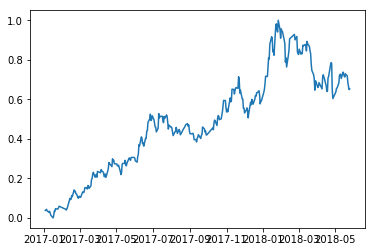

In [9]:
df = prepare_data(df)
plt.plot(df['收盘价'])

In [10]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 8weeks
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    
    train = result[:int(row), :] # 90% date
    X_train = train[:, :-1] # all data until day m
    y_train = train[:, 0][:,-1] # day m + 1 adjusted close price
    
    X_test = result[int(row):, :-1]
    y_test = result[int(row):, 0][:,-1] 

    X_train = np.reshape(X_train, (X_train.shape[0], amount_of_features, 
                                   X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0],amount_of_features, 
                                 X_test.shape[1]))  

    return [X_train, y_train, X_test, y_test]
    #return train

In [11]:
window = 15
X_train, y_train, X_test, y_test = load_data(df, window)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(290, 12, 15)
(32, 12, 15)
(290,)
(32,)


In [13]:
model = Sequential()

model.add(LSTM(16, input_shape=(12, window), return_sequences = False))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                2048      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 2,065
Trainable params: 2,065
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.fit(X_train, y_train, epochs =150, batch_size = 1, verbose = 2, shuffle= False)

Epoch 1/50
 - 2s - loss: 1.9286e-04
Epoch 2/50
 - 2s - loss: 1.8435e-04
Epoch 3/50
 - 1s - loss: 1.8493e-04
Epoch 4/50
 - 2s - loss: 1.8784e-04
Epoch 5/50
 - 1s - loss: 2.1062e-04
Epoch 6/50
 - 1s - loss: 3.2903e-04
Epoch 7/50
 - 1s - loss: 4.8493e-04
Epoch 8/50
 - 1s - loss: 4.9040e-04
Epoch 9/50
 - 1s - loss: 3.5002e-04
Epoch 10/50
 - 1s - loss: 2.0520e-04
Epoch 11/50
 - 1s - loss: 1.8354e-04
Epoch 12/50
 - 1s - loss: 1.7828e-04
Epoch 13/50
 - 1s - loss: 1.8568e-04
Epoch 14/50
 - 1s - loss: 1.8012e-04
Epoch 15/50
 - 1s - loss: 1.7743e-04
Epoch 16/50
 - 1s - loss: 1.9940e-04
Epoch 17/50
 - 1s - loss: 1.9525e-04
Epoch 18/50
 - 1s - loss: 1.6382e-04
Epoch 19/50
 - 1s - loss: 1.5829e-04
Epoch 20/50
 - 2s - loss: 1.6534e-04
Epoch 21/50
 - 1s - loss: 2.0212e-04
Epoch 22/50
 - 1s - loss: 2.7637e-04
Epoch 23/50
 - 1s - loss: 3.3745e-04
Epoch 24/50
 - 1s - loss: 4.2803e-04
Epoch 25/50
 - 2s - loss: 4.3983e-04
Epoch 26/50
 - 1s - loss: 3.6830e-04
Epoch 27/50
 - 1s - loss: 2.9893e-04
Epoch 28/5

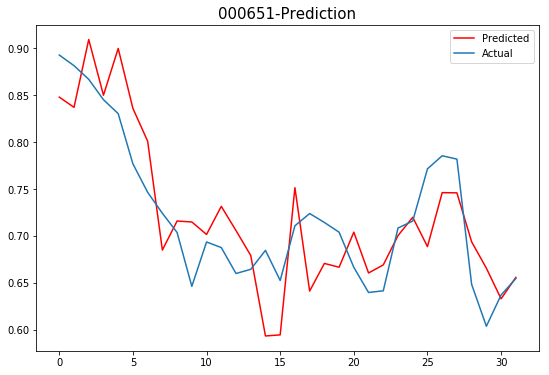

In [18]:
p = model.predict(X_test)

title = stock_code+'-Prediction'
plt.figure(figsize = (9,6))
plt.plot(p,color = 'red', label = 'Predicted')
plt.plot(y_test, label = 'Actual')
plt.title(title, fontsize = 15)
plt.legend(loc = 'best')
plt.show()

In [19]:
save_loc = path+stock_code+'.h5'
#保存模型
model.save(save_loc)

End of Code